<a href="https://colab.research.google.com/github/abshilpa/Chronic-Kidney-Disease-Data-Science-Project/blob/main/spaceship_titanic_1new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step 1: Clean Data Loading and Initial Inspection

In [ ]:
# STEP-1 Load data and basic inspection

import pandas as pd

# Load datasets
train_df = pd.read_csv('https://raw.githubusercontent.com/Titanic-minds-group-14/Kaggle-challenge-group-14-/refs/heads/main/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/Titanic-minds-group-14/Kaggle-challenge-group-14-/refs/heads/main/test.csv')

# Show shape and preview
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print("\nTrain sample:")
display(train_df.head())

# Check for null values
print("\nMissing values in train:")
print(train_df.isnull().sum())


Train shape: (8693, 14)
Test shape: (4277, 13)

Train sample:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



Missing values in train:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


##Step 2: Advanced EDA & Missing Data Strategy

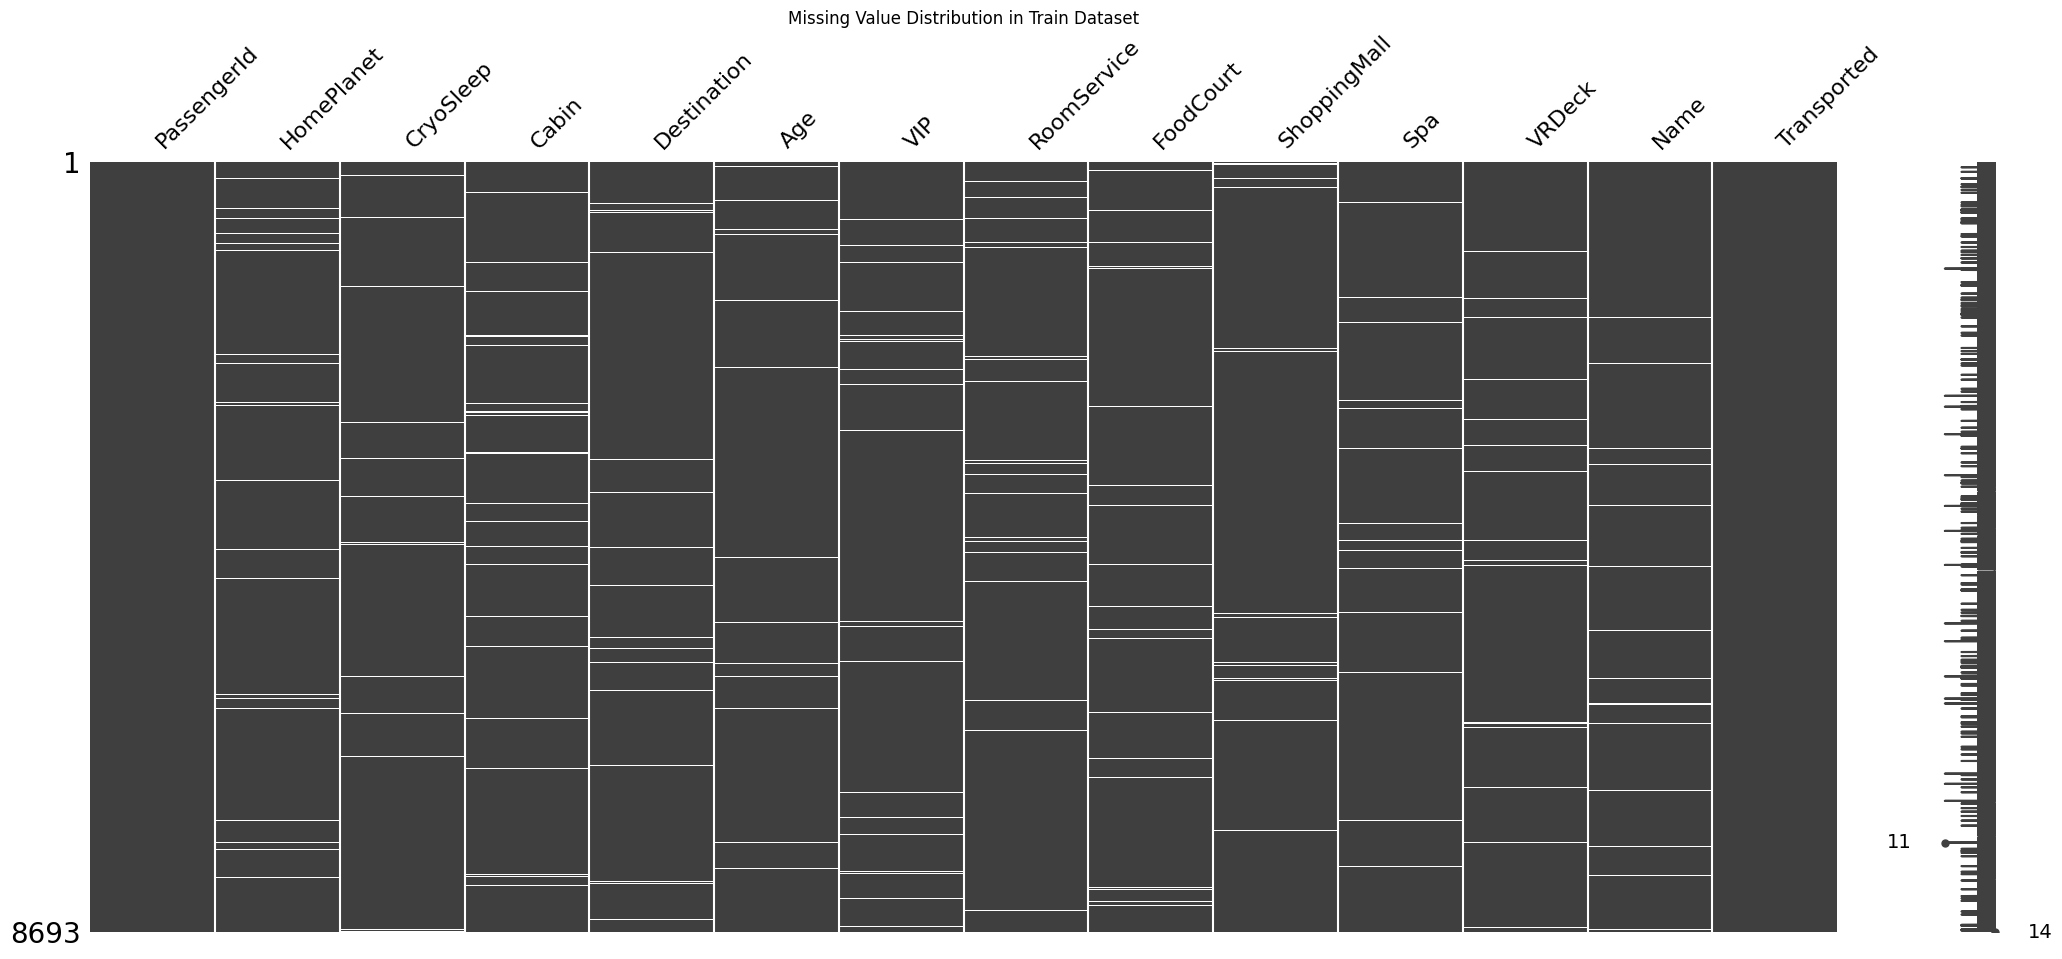

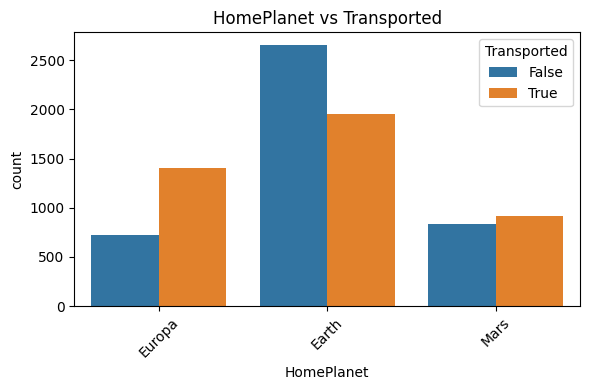

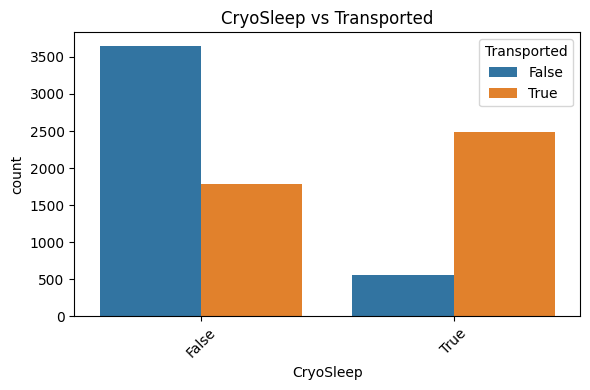

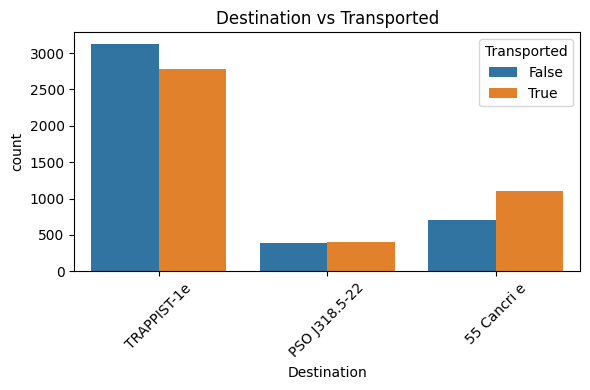

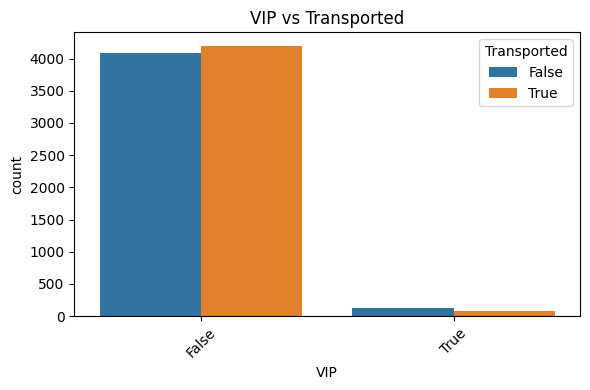

In [ ]:
# STEP 2: Visualize missing data and inspect key categorical features

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Visualize missing values
msno.matrix(train_df)
plt.title("Missing Value Distribution in Train Dataset")
plt.show()

# Categorical distributions vs target
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_df, x=col, hue='Transported')
    plt.title(f'{col} vs Transported')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##Step 3: Smart Missing Value Handling + Feature Engineering

In [ ]:
# STEP 3: Handle missing values & engineer meaningful features

# 1. Fill categorical nulls with mode
cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
for col in cat_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# 2. Fill Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# 3. Fill luxury service columns with 0 (likely not used)
lux_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in lux_cols:
    train_df[col].fillna(0, inplace=True)
    test_df[col].fillna(0, inplace=True)

# 4. Extract Deck, CabinNum, and Side from Cabin
def process_cabin(df):
    df[['Deck', 'CabinNum', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df.drop(columns=['Cabin'], inplace=True)
    return df

train_df = process_cabin(train_df)
test_df = process_cabin(test_df)

# 5. Drop Name (low predictive power unless you do NLP)
train_df.drop(columns=['Name'], inplace=True)
test_df.drop(columns=['Name'], inplace=True)

# 6. Convert CryoSleep and VIP to bool
train_df['CryoSleep'] = train_df['CryoSleep'].astype(bool)
train_df['VIP'] = train_df['VIP'].astype(bool)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(bool)
test_df['VIP'] = test_df['VIP'].astype(bool)

# Preview results
print("Post-processing preview:")
display(train_df.head())


Post-processing preview:


/tmp/ipython-input-3-2873222490.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
/tmp/ipython-input-3-2873222490.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNum,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


##Step 4: Encoding Categorical Features + Final Feature Selection

In [ ]:
# STEP 4: Encode and finalize features

from sklearn.preprocessing import LabelEncoder

# Encode boolean columns
bool_cols = ['CryoSleep', 'VIP']
for col in bool_cols:
    train_df[col] = train_df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

# Identify features for one-hot encoding
onehot_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']

# Apply one-hot encoding
train_df = pd.get_dummies(train_df, columns=onehot_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=onehot_cols, drop_first=True)

# Align columns between train and test
X = train_df.drop(columns=['Transported', 'PassengerId'])
y = train_df['Transported'].astype(int)
X_test = test_df.drop(columns=['PassengerId'])

X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

# Final shape check
print("Train features shape:", X.shape)
print("Test features shape:", X_test.shape)


Train features shape: (8693, 21)
Test features shape: (4277, 21)
